In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import colormaps as cmaps
from readCMIP5 import *

%pylab inline

matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

Populating the interactive namespace from numpy and matplotlib


In [20]:
lat, lon, snow_depth = readCMIP5Data("../data/SnowDepth_snd/", "gridded", "rcp45", "1", "snd")

In [38]:
mean_snow_depth = snow_depth.mean(axis=0).mean(axis=0)

mean_snow_depth.shape

(56, 320)

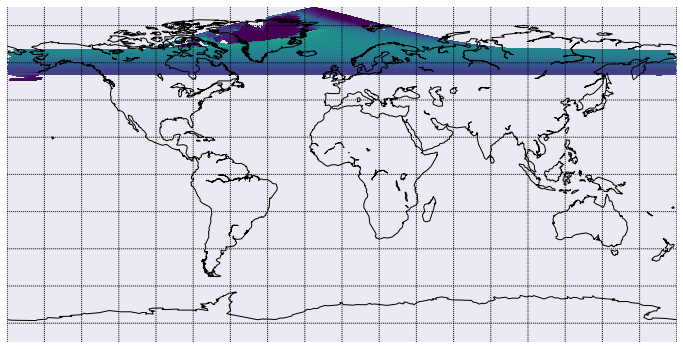

In [21]:
map = Basemap()

map.drawparallels(np.arange(-80.,81.,20.), )
map.drawmeridians(np.arange(-180.,181.,20.))
map.drawcoastlines()
x, y = map(lon, lat)
map.pcolormesh(x, y, mean_snow_depth, cmap=cmaps.viridis, latlon=True)

plt.show()

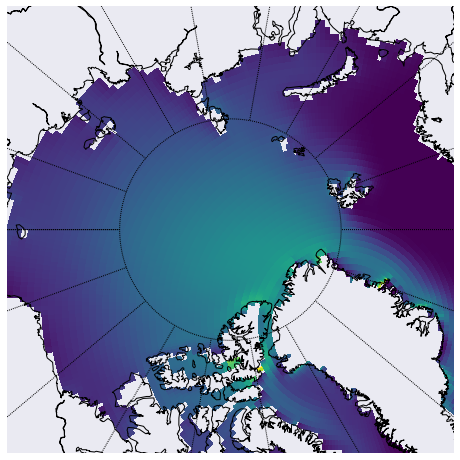

In [23]:
map = Basemap(projection='npstere',boundinglat=70,lon_0=270,resolution='l')

map.drawparallels(np.arange(-80.,81.,20.), )
map.drawmeridians(np.arange(-180.,181.,20.))
map.drawcoastlines()
x, y = map(lon, lat)
map.pcolormesh(x, y, mean_snow_depth, cmap=cmaps.viridis)

plt.show()

In [41]:
var_snow_depth = snow_depth.var(axis=0).var(axis=0)
var_snow_depth.shape

(56, 320)

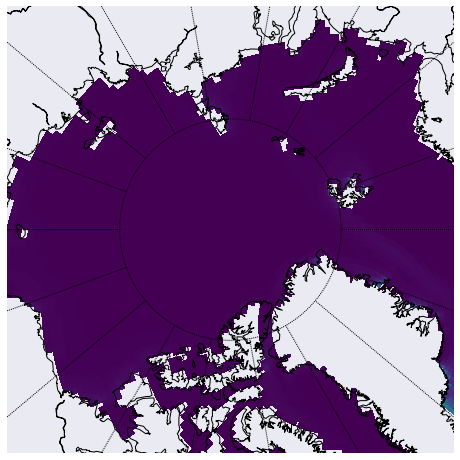

In [42]:
ax = matplotlib.pyplot.gca() 
map = Basemap(projection='npstere',boundinglat=70,lon_0=270,resolution='l')

map.drawparallels(np.arange(-80.,81.,20.), )
map.drawmeridians(np.arange(-180.,181.,20.))
map.drawcoastlines()
x, y = map(lon,lat)
map.pcolormesh(x, y, var_snow_depth, cmap=cmaps.viridis)

plt.show()

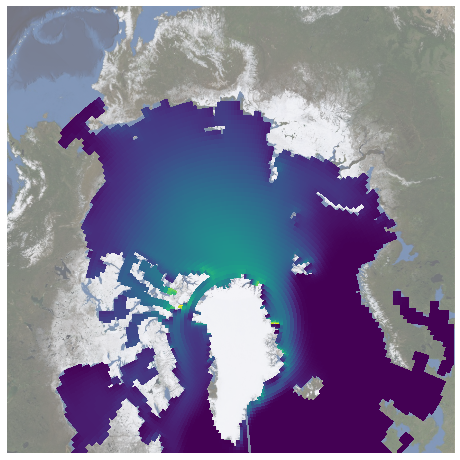

In [45]:
lat_ts=90.0
lat_0=90.0
lon_0=-45.0
sgn=1
width=7000000.
height=7000000.0
map = Basemap(width=width,height=height,resolution='h',\
            projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
map.bluemarble(alpha=0.5) 
x, y = map(lon,lat)
map.pcolormesh(x, y, mean_snow_depth, cmap=cmaps.viridis)
plt.show()

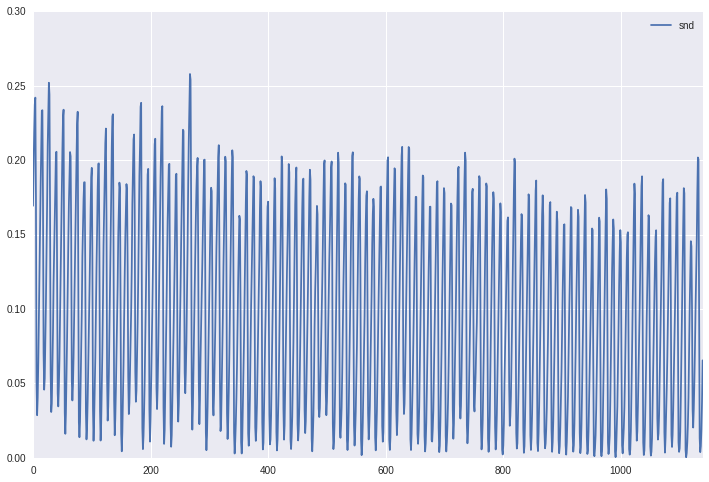

In [54]:
pd.DataFrame(snow_depth.mean(axis=3).mean(axis=2).reshape([95*12]), columns=["snd"]).plot()